Copula Models in Multivariate Financial Data Analysis

In the world of finance, analyzing the relationships between various financial assets is a fundamental task. Traditional correlation metrics may not capture the complex dependencies present in multivariate financial data. Copula models provide a flexible framework to model the joint distribution of multiple variables, regardless of their individual marginal distributions. Throughout this tutorial, we will explore how copulas can help us gain insights into the correlation and dependency structures of different financial assets. By leveraging Python’s powerful libraries and tools, we will demonstrate the practical implementation of copula models for financial data analysis. Now, let’s embark on a journey to unravel the potential of copula models in understanding multivariate financial data relationships. Let’s start by understanding the essence of copulas and their significance in financial analysis.


Understanding Copulas: Comprehensive explanation of copulas and their importance in finance.

Copulas are powerful statistical tools used to model the dependency structure between multiple random variables. Unlike traditional correlation analysis, copulas focus on capturing the underlying relationships between variables without making assumptions about their individual distributions. This property makes copulas especially valuable in finance, where the relationships between assets can be complex and nonlinear. In the context of multivariate financial data analysis, copulas allow us to assess the joint behavior of different assets, identify diversification opportunities and manage portfolio risk effectively. By modeling the dependency structure with copulas, we can better understand the true underlying relationships between assets and make more informed investment decisions. In Python, several libraries provide robust support for working with copulas, enabling us to perform advanced analysis and modeling tasks with ease. These libraries offer a range of copula models, methods for parameter estimation and tools for visualizing the results, making them indispensable for financial analysts, data scientists and researchers alike. Now, let’s dive deeper into the world of copulas and explore how they can revolutionize the way we analyze and interpret multivariate financial data. But first, let’s set the stage by importing the necessary libraries and downloading financial data for our analysis. Let’s get started with the code below:

In [2]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import yfinance as yf
# Downloading financial data
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
data = yf.download(tickers, period='1y')['Adj Close']
# Saving data to a CSV file
data.to_csv('my.csv')

[*********************100%%**********************]  4 of 4 completed


/Users/yash/Library/Python/3.8/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


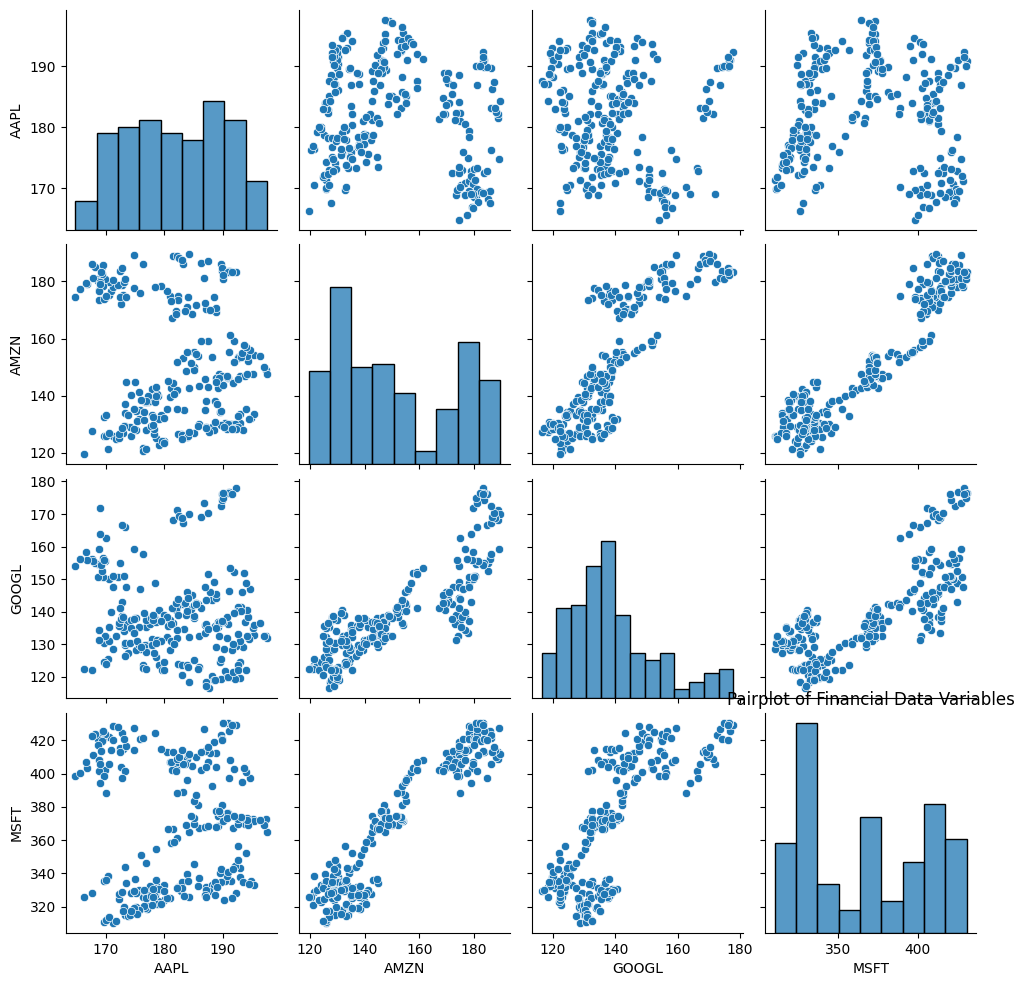

In [3]:
# Importing necessary libraries for copulas
import matplotlib.pyplot as plt 
import seaborn as sns
# Creating a scatter plot matrix to visualize the relationships between variables
sns.pairplot(data)
plt.title('Pairplot of Financial Data Variables')
plt.show()

In [4]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

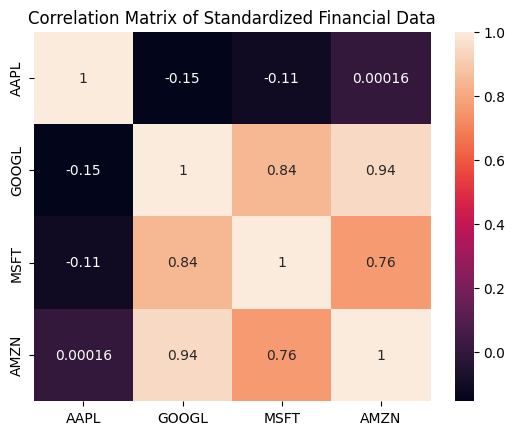

In [6]:
# Creating a heatmap to visualize the correlation matrix of the standardized data
corr_matrix = np.corrcoef(data_scaled.T)
sns.heatmap(corr_matrix, annot=True, xticklabels=tickers, yticklabels=tickers) 
plt.title('Correlation Matrix of Standardized Financial Data')
plt.show()

In [10]:
# pip install copulas
# Importing necessary libraries for copulas
from copulas.multivariate import GaussianMultivariate
# Fitting a Gaussian copula model to the standardized data
copula = GaussianMultivariate() 
copula.fit(data_scaled)

/Users/yash/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/Users/yash/Library/Python/3.8/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/yash/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/Users/yash/Library/Python/3.8/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/yash/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/yash/Library/Python/3.8/lib/python/site-packages/scipy/stat

In [11]:
 # Generating synthetic data from the fitted copula
synthetic_data = copula.sample(len(data)) # Replacing 'n_samples' with the correct argument

In [12]:
 # Inverse transforming the synthetic data to the original scale
synthetic_data_original = scaler.inverse_transform(synthetic_data)


/Users/yash/Library/Python/3.8/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


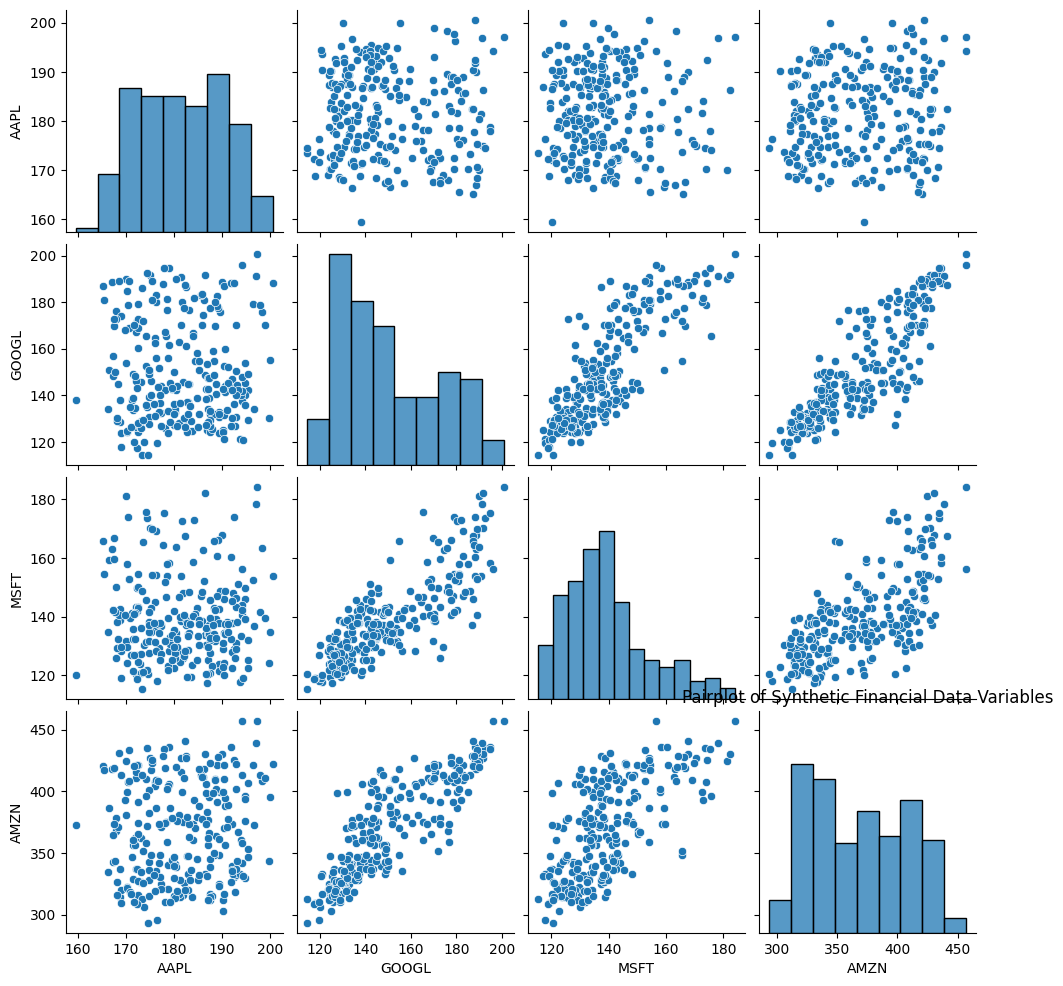

In [14]:
# Creating a scatter plot matrix to visualize the relationships between variables in synthetic data
synthetic_df = pd.DataFrame(synthetic_data_original, columns=tickers) 
sns.pairplot(synthetic_df)
plt.title('Pairplot of Synthetic Financial Data Variables')
plt.show()

/Users/yash/Library/Python/3.8/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


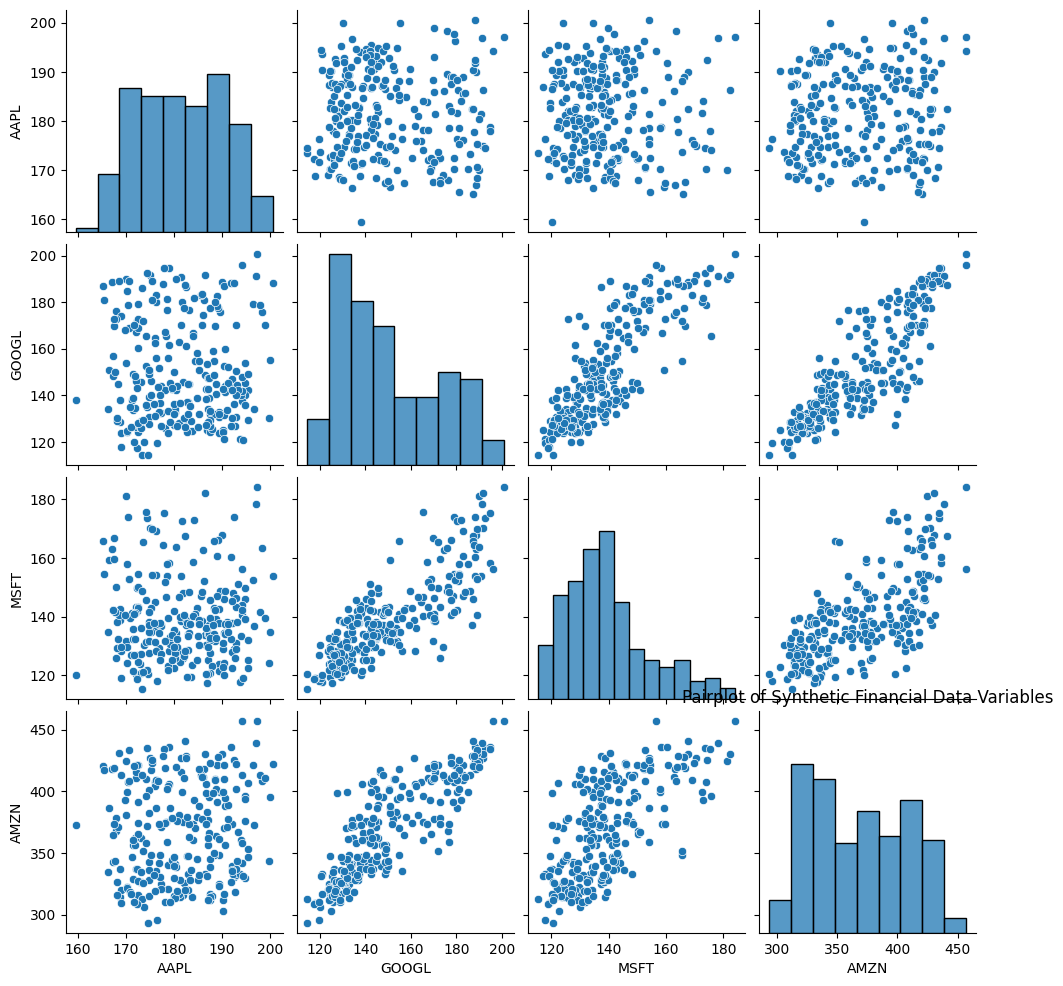

In [15]:
# Visualizing the scatter plot matrix of the synthetic data
sns.pairplot(synthetic_df)
plt.title('Pairplot of Synthetic Financial Data Variables')
plt.show()

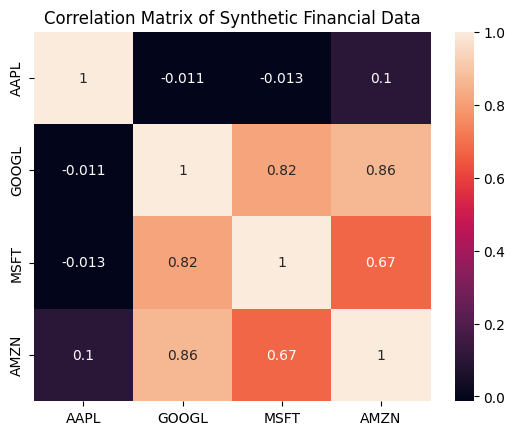

In [18]:
# Creating a heatmap to visualize the correlation matrix of the synthetic data
synthetic_corr_matrix = np.corrcoef(synthetic_data_original.T) 
sns.heatmap(synthetic_corr_matrix, annot=True, xticklabels=tickers, yticklabels=tickers) 
plt.title('Correlation Matrix of Synthetic Financial Data')
plt.show()